In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random
import lifelines

In [6]:
path_verylow = '../data/BernardEtAl/VeryLow.csv'
df_verylow = pd.read_csv(path_verylow, sep='\t')
path_low = '../data/BernardEtAl/Low.csv'
df_low = pd.read_csv(path_low, sep='\t')
path_int = '../data/BernardEtAl/Int.csv'
df_int = pd.read_csv(path_int, sep='\t')
path_high = '../data/BernardEtAl/High.csv'
df_high = pd.read_csv(path_high, sep='\t')
path_veryhigh = '../data/BernardEtAl/VeryHigh.csv'
df_veryhigh = pd.read_csv(path_veryhigh, sep='\t')

,Case ID,Number at Risk,Status,Survival Rate,Time (months)
0,E-H-117419,482,censored,1.000000,0.000000
1,E-H-105850,481,censored,1.000000,0.000000
2,E-H-105880,480,censored,1.000000,0.000000
3,E-H-110409,479,censored,1.000000,0.000000
4,E-H-110822,478,censored,1.000000,0.000000
...,...,...,...,...,...
477,E-H-116729,5,censored,0.329087,174.641096
478,E-H-105459,4,censored,0.329087,176.975343
479,E-H-105982,3,censored,0.329087,184.701370
480,E-H-105515,2,deceased,0.164543,191.276712


In [7]:
# Add a column with the risk group to each of the dataframes
df_verylow['Risk Group'] = 'Very Low'
df_low['Risk Group'] = 'Low'
df_int['Risk Group'] = 'Intermediate'
df_high['Risk Group'] = 'High'
df_veryhigh['Risk Group'] = 'Very High'

# Concatenate the dataframes
df_survival = pd.concat([df_verylow, df_low, df_int, df_high, df_veryhigh])

,Case ID,Number at Risk,Status,Survival Rate,Time (months),Risk Group
0,E-H-117419,482,censored,1.000000,0.000000,Very Low
1,E-H-105850,481,censored,1.000000,0.000000,Very Low
2,E-H-105880,480,censored,1.000000,0.000000,Very Low
3,E-H-110409,479,censored,1.000000,0.000000,Very Low
4,E-H-110822,478,censored,1.000000,0.000000,Very Low
...,...,...,...,...,...,...
355,E-H-105678,5,censored,0.058110,77.786301,Very High
356,E-H-116517,4,deceased,0.043582,79.923288,Very High
357,E-H-105691,3,censored,0.043582,97.380822,Very High
358,E-H-105650,2,censored,0.043582,129.665753,Very High


In [8]:
# map censored values to 0 and decesead values to 1
df_survival['Status'] = df_survival['Status'].map({'censored': 0, 'deceased': 1})

df_survival

,Case ID,Number at Risk,Status,Survival Rate,Time (months),Risk Group
0,E-H-117419,482,0,1.000000,0.000000,Very Low
1,E-H-105850,481,0,1.000000,0.000000,Very Low
2,E-H-105880,480,0,1.000000,0.000000,Very Low
3,E-H-110409,479,0,1.000000,0.000000,Very Low
4,E-H-110822,478,0,1.000000,0.000000,Very Low
...,...,...,...,...,...,...
355,E-H-105678,5,0,0.058110,77.786301,Very High
356,E-H-116517,4,1,0.043582,79.923288,Very High
357,E-H-105691,3,0,0.043582,97.380822,Very High
358,E-H-105650,2,0,0.043582,129.665753,Very High


In [11]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

In [12]:
T = df_survival['Time (months)']
E = df_survival['Status']

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3000 total observations, 1503 right-censored observations>

<AxesSubplot:xlabel='timeline'>

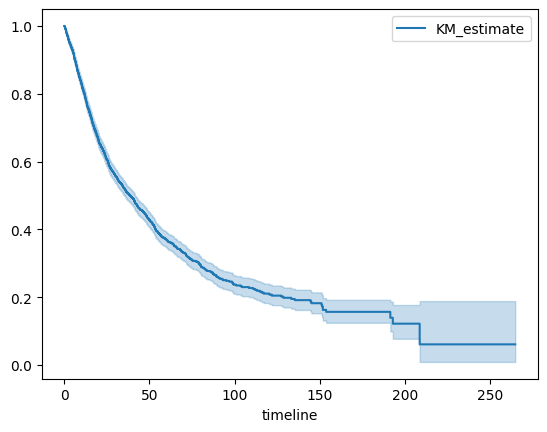

In [13]:
kmf.plot_survival_function()

In [16]:
from lifelines.utils import median_survival_times
median_ci = median_survival_times(kmf.confidence_interval_)
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,35.342466,41.556164


In [17]:
def revised_coin_toss(category, n, p):

    '''
    category: IPSS-R category, value to be privatized
    n: number of categories (not used in this function, used to compute the epsilon)
    p: coin bias
    '''
    # check if the possible epsilon is negative
    def verify_epsilon(p,n):
        return np.log((n*p+1-p)/(n-1-n*p+p))
        if epsilon <= 0:
            print('epsilon is negative for such values of p and n')
            exit()
        else:
            return epsilon
    
    # compute epsilon
    epsilon = verify_epsilon(p,n)

    # toss a coin H with probability p, T with probability 1-p
    coin = np.random.choice(['H', 'T'], p=[p, 1-p])

    # if coin is H, return the original value
    if coin == 'H':
        return category
    
    # if coin is T, return a random value from the n categories
    else:
        return random.choice(['Very Low', 'Low', 'Intermediate', 'High', 'Very High'])


In [43]:
p1 = 0.9

# create a new column with the privatized values
df_survival['Privatized Risk Group'] = df_survival['Risk Group'].apply(lambda x: revised_coin_toss(x, len(df_survival['Risk Group'].unique()), p1))

time_real_event = df_survival['Time (months)']
censoring_real_event = df_survival['Status']
y = df_survival['Privatized Risk Group']

In [29]:
T = df_survival['Time (months)']
E = df_survival['Status']

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3000 total observations, 1503 right-censored observations>

<AxesSubplot:xlabel='timeline'>

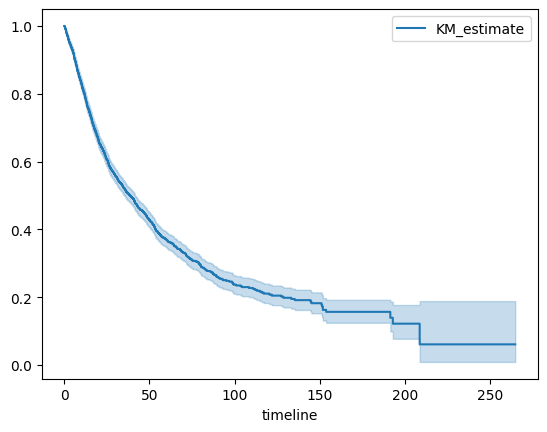

In [30]:
kmf.plot_survival_function()

In [31]:
from lifelines.utils import median_survival_times
median_ci_dp = median_survival_times(kmf.confidence_interval_)
median_ci_dp

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,35.342466,41.556164


In [32]:
median_ci

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.5,35.342466,41.556164


In [35]:
ix = df_survival['Risk Group'] == 'Low'
T_exp, E_exp = df_survival.loc[ix, 'Time (months)'], df_survival.loc[ix, 'Status']
T_con, E_con = df_survival.loc[~ix, 'Time (months)'], df_survival.loc[~ix, 'Status']


In [40]:
from lifelines.statistics import logrank_test
results = logrank_test(T_exp, T_con, event_observed_A=E_exp, event_observed_B=E_con)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
         104.40 <0.005     79.00

In [44]:
ix = df_survival['Privatized Risk Group'] == 'Low'
T_exp, E_exp = df_survival.loc[ix, 'Time (months)'], df_survival.loc[ix, 'Status']
T_con, E_con = df_survival.loc[~ix, 'Time (months)'], df_survival.loc[~ix, 'Status']


In [45]:
from lifelines.statistics import logrank_test
results = logrank_test(T_exp, T_con, event_observed_A=E_exp, event_observed_B=E_con)
results.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          99.21 <0.005     75.22